# Kapitel 7: Neuronale Netzwerke - Grundlagen

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pylab as plt
import numpy as np

In [4]:
colors = 'bwr'#['b','y','r']
CMAP = colors#plt.cm.rainbow

In [5]:
import sklearn
print(sklearn.__version__)

1.0.2


In [6]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [7]:
import keras
print(keras.__version__)

2.4.0


Using TensorFlow backend.


In [8]:
import pandas as pd
print(pd.__version__)

1.3.5


## Iris mit Neuronalen Netzwerken

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()

In [10]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027CD3295288>,
      dtype=object)

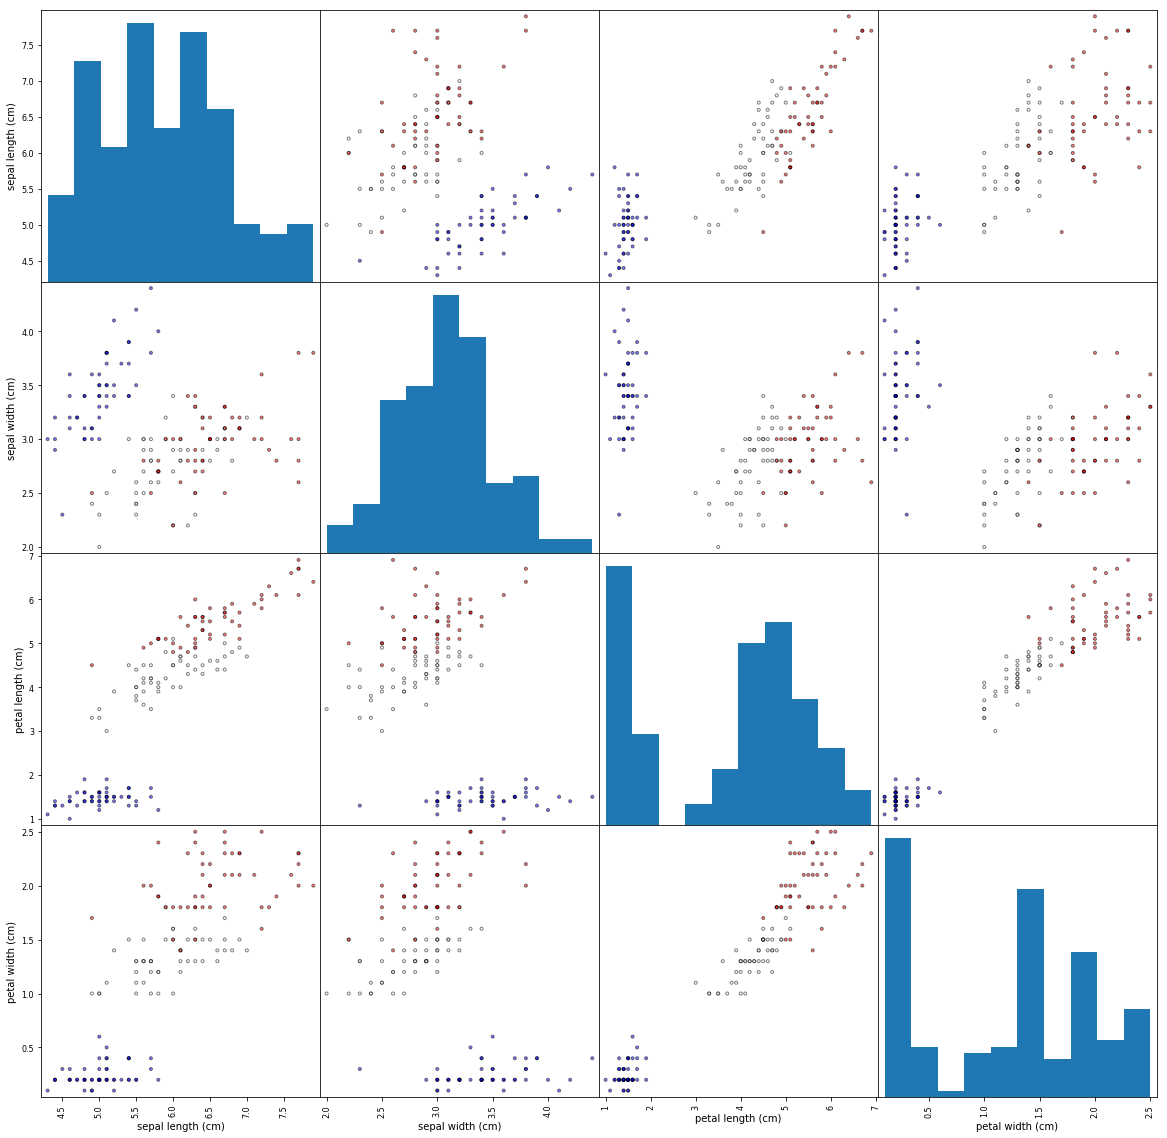

In [11]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, cmap=CMAP, edgecolor='black', figsize=(20, 20))

In [12]:
# plt.savefig('ML_0701.png', bbox_inches='tight')

## Das künstliche Neuron

In [13]:
w0 = 3
w1 = -4
w2 = 2

def neuron_no_activation(x1, x2):
    sum = w0 + x1 * w1 + x2 * w2
    return sum

In [14]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [15]:
neuron_no_activation(5.1, 3.5)

-10.399999999999999

### Activation Functions

In [16]:
def centerAxis(uses_negative=False):
    # http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    if uses_negative:
        ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

#### Step Function: abrupter, nicht stetig differenzierbarer Übergang zwischen 0 und 1

In [17]:
def np_step(X):
    return 0.5 * (np.sign(X) + 1)

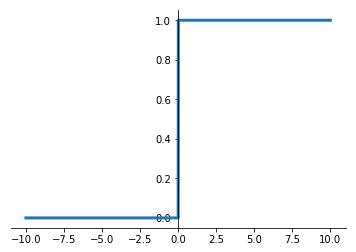

In [18]:
x = np.arange(-10,10,0.01)
y = np_step(x)

centerAxis()
plt.plot(x, y, lw=3)

#### Sigmoid Function: Fließender Übergang zwischen 0 und 1

In [19]:
def np_sigmoid(X):
    return 1 / (1 + np.exp(X * -1))

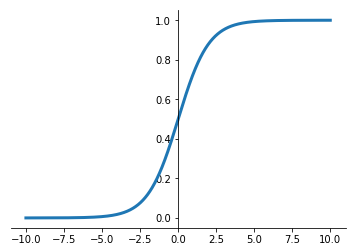

In [20]:
x = np.arange(-10,10,0.01)
y = np_sigmoid(x)

centerAxis()
plt.plot(x,y,lw=3)

#### Tangens Hyperbolicus Function: Fließender Übergang zwischen -1 und 1

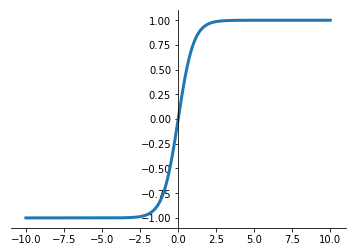

In [21]:
x = np.arange(-10,10,0.01)
y = np.tanh(x)

centerAxis()
plt.plot(x,y,lw=3)

#### Relu: Einfach zu berechnen, setzt kompletten negativen Wertebereich auf 0

In [22]:
def np_relu(x):
    return np.maximum(0, x)

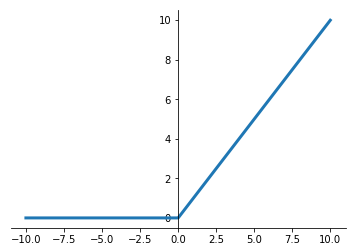

In [23]:
x = np.arange(-10,10,0.01)
y = np_relu(x)

centerAxis()
plt.plot(x,y,lw=3)

In [24]:
# https://docs.python.org/3/library/math.html
import math as math
def sigmoid(x):
    return 1 / (1 + math.exp(x * -1))

w0 = 3
w1 = -4
w2 = 2

def neuron(x1, x2):
    sum = w0 + x1 * w1 + x2 * w2
    return sigmoid(sum)

In [25]:
neuron(5.1, 3.5)

3.043155690056538e-05

In [26]:
# Version that takes as many values as you like
weights_with_bias = np.array([3, -4, 2])
def np_neuron(X):
    inputs_with_1_for_bias = np.concatenate((np.array([1]), X))
    return np_sigmoid(np.sum(inputs_with_1_for_bias*weights_with_bias));

In [27]:
np_neuron(np.array([5.1, 3.5]))

3.043155690056538e-05

## Unser erste Neuronales Netz mit Keras

In [28]:
from keras.layers import Input
inputs = Input(shape=(4, ))

In [29]:
from keras.layers import Dense
fc = Dense(3)(inputs)

In [30]:
from keras.models import Model
model = Model(inputs=inputs, outputs=fc)

In [31]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[ 4.42523   ,  5.715174  , -0.48006564]], dtype=float32)

In [34]:
inputs = Input(shape=(4, ))
fc = Dense(3)(inputs)
predictions = Dense(3, activation='softmax')(fc)
model = Model(inputs=inputs, outputs=predictions)

In [35]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[0.4975115 , 0.08040008, 0.42208847]], dtype=float32)

# Training

In [38]:
X = np.array(iris.data)
y = np.array(iris.target)
X.shape, y.shape

((150, 4), (150,))

In [39]:
y[100]

2

In [40]:
from keras.utils.np_utils import to_categorical

num_categories = 3

y = to_categorical(y, num_categories)

In [41]:
y[100]

array([0., 0., 1.], dtype=float32)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [44]:
# !rm -r tf_log

# https://keras.io/callbacks/#tensorboard
# tb_callback = keras.callbacks.TensorBoard(log_dir='./tf_log')
# To start tensorboard
# tensorboard --logdir=/mnt/c/Users/olive/Development/ml/tf_log
# open http://localhost:6006

In [45]:
# %time model.fit(X_train, y_train, epochs=500, validation_split=0.3, callbacks=[tb_callback])
%time model.fit(X_train, y_train, epochs=500, validation_split=0.3)

Epoch 1/500
3/3 [==============================] - 2s 494ms/step - loss: 1.7977 - accuracy: 0.6596 - val_loss: 1.8237 - val_accuracy: 0.6389
Epoch 2/500
3/3 [==============================] - 0s 59ms/step - loss: 1.7703 - accuracy: 0.6479 - val_loss: 1.7773 - val_accuracy: 0.6389
Epoch 3/500
3/3 [==============================] - 0s 64ms/step - loss: 1.5985 - accuracy: 0.6869 - val_loss: 1.7326 - val_accuracy: 0.6389
Epoch 4/500
3/3 [==============================] - 0s 80ms/step - loss: 1.6346 - accuracy: 0.6596 - val_loss: 1.6879 - val_accuracy: 0.6389
Epoch 5/500
3/3 [==============================] - 0s 56ms/step - loss: 1.6380 - accuracy: 0.6479 - val_loss: 1.6449 - val_accuracy: 0.6389
Epoch 6/500
3/3 [==============================] - 0s 35ms/step - loss: 1.4708 - accuracy: 0.6908 - val_loss: 1.6038 - val_accuracy: 0.6389
Epoch 7/500
3/3 [==============================] - 0s 38ms/step - loss: 1.5409 - accuracy: 0.6596 - val_loss: 1.5632 - val_accuracy: 0.6389
Epoch 8/500
3/3 [==

3/3 [==============================] - 0s 44ms/step - loss: 0.9490 - accuracy: 0.3424 - val_loss: 0.9361 - val_accuracy: 0.3611
Epoch 60/500
3/3 [==============================] - 0s 52ms/step - loss: 0.9424 - accuracy: 0.3190 - val_loss: 0.9326 - val_accuracy: 0.3611
Epoch 61/500
3/3 [==============================] - 0s 53ms/step - loss: 0.9273 - accuracy: 0.3268 - val_loss: 0.9292 - val_accuracy: 0.3611
Epoch 62/500
3/3 [==============================] - 0s 59ms/step - loss: 0.9306 - accuracy: 0.3385 - val_loss: 0.9257 - val_accuracy: 0.3611
Epoch 63/500
3/3 [==============================] - 0s 76ms/step - loss: 0.9150 - accuracy: 0.3464 - val_loss: 0.9223 - val_accuracy: 0.3611
Epoch 64/500
3/3 [==============================] - 0s 36ms/step - loss: 0.9219 - accuracy: 0.3385 - val_loss: 0.9187 - val_accuracy: 0.3611
Epoch 65/500
3/3 [==============================] - 0s 54ms/step - loss: 0.9003 - accuracy: 0.3542 - val_loss: 0.9152 - val_accuracy: 0.3611
Epoch 66/500
3/3 [========

3/3 [==============================] - 0s 55ms/step - loss: 0.7124 - accuracy: 0.7204 - val_loss: 0.7237 - val_accuracy: 0.6667
Epoch 118/500
3/3 [==============================] - 0s 29ms/step - loss: 0.7090 - accuracy: 0.7126 - val_loss: 0.7201 - val_accuracy: 0.6667
Epoch 119/500
3/3 [==============================] - 0s 52ms/step - loss: 0.7226 - accuracy: 0.6735 - val_loss: 0.7164 - val_accuracy: 0.6667
Epoch 120/500
3/3 [==============================] - 0s 43ms/step - loss: 0.7019 - accuracy: 0.7243 - val_loss: 0.7129 - val_accuracy: 0.6667
Epoch 121/500
3/3 [==============================] - 0s 81ms/step - loss: 0.7225 - accuracy: 0.6775 - val_loss: 0.7092 - val_accuracy: 0.6667
Epoch 122/500
3/3 [==============================] - 0s 72ms/step - loss: 0.6832 - accuracy: 0.7342 - val_loss: 0.7058 - val_accuracy: 0.6667
Epoch 123/500
3/3 [==============================] - 0s 45ms/step - loss: 0.7036 - accuracy: 0.6990 - val_loss: 0.7022 - val_accuracy: 0.6667
Epoch 124/500
3/3 [=

Epoch 175/500
3/3 [==============================] - 0s 78ms/step - loss: 0.5297 - accuracy: 0.8071 - val_loss: 0.5480 - val_accuracy: 0.8611
Epoch 176/500
3/3 [==============================] - 0s 40ms/step - loss: 0.5364 - accuracy: 0.7993 - val_loss: 0.5456 - val_accuracy: 0.8611
Epoch 177/500
3/3 [==============================] - 0s 33ms/step - loss: 0.5391 - accuracy: 0.8110 - val_loss: 0.5433 - val_accuracy: 0.8611
Epoch 178/500
3/3 [==============================] - 0s 40ms/step - loss: 0.5243 - accuracy: 0.8032 - val_loss: 0.5410 - val_accuracy: 0.8611
Epoch 179/500
3/3 [==============================] - 0s 51ms/step - loss: 0.5248 - accuracy: 0.8071 - val_loss: 0.5389 - val_accuracy: 0.8611
Epoch 180/500
3/3 [==============================] - 0s 41ms/step - loss: 0.5425 - accuracy: 0.7759 - val_loss: 0.5367 - val_accuracy: 0.9167
Epoch 181/500
3/3 [==============================] - 0s 80ms/step - loss: 0.5299 - accuracy: 0.7759 - val_loss: 0.5348 - val_accuracy: 0.8611
Epoch 

Epoch 233/500
3/3 [==============================] - 0s 38ms/step - loss: 0.4394 - accuracy: 0.8956 - val_loss: 0.4425 - val_accuracy: 0.9722
Epoch 234/500
3/3 [==============================] - 0s 94ms/step - loss: 0.4383 - accuracy: 0.8722 - val_loss: 0.4411 - val_accuracy: 0.9722
Epoch 235/500
3/3 [==============================] - 0s 37ms/step - loss: 0.4312 - accuracy: 0.8839 - val_loss: 0.4399 - val_accuracy: 0.9722
Epoch 236/500
3/3 [==============================] - 0s 59ms/step - loss: 0.4258 - accuracy: 0.8800 - val_loss: 0.4384 - val_accuracy: 0.9722
Epoch 237/500
3/3 [==============================] - 0s 46ms/step - loss: 0.4220 - accuracy: 0.9035 - val_loss: 0.4369 - val_accuracy: 0.9722
Epoch 238/500
3/3 [==============================] - 0s 42ms/step - loss: 0.4505 - accuracy: 0.8899 - val_loss: 0.4353 - val_accuracy: 0.9722
Epoch 239/500
3/3 [==============================] - 0s 91ms/step - loss: 0.4135 - accuracy: 0.9250 - val_loss: 0.4341 - val_accuracy: 0.9722
Epoch 

3/3 [==============================] - 0s 91ms/step - loss: 0.3987 - accuracy: 0.9018 - val_loss: 0.3718 - val_accuracy: 1.0000
Epoch 291/500
3/3 [==============================] - 0s 42ms/step - loss: 0.3645 - accuracy: 0.9252 - val_loss: 0.3707 - val_accuracy: 1.0000
Epoch 292/500
3/3 [==============================] - 0s 80ms/step - loss: 0.3801 - accuracy: 0.9252 - val_loss: 0.3697 - val_accuracy: 1.0000
Epoch 293/500
3/3 [==============================] - 0s 41ms/step - loss: 0.3782 - accuracy: 0.9018 - val_loss: 0.3687 - val_accuracy: 1.0000
Epoch 294/500
3/3 [==============================] - 0s 49ms/step - loss: 0.3718 - accuracy: 0.9135 - val_loss: 0.3676 - val_accuracy: 1.0000
Epoch 295/500
3/3 [==============================] - 0s 47ms/step - loss: 0.3628 - accuracy: 0.9408 - val_loss: 0.3665 - val_accuracy: 1.0000
Epoch 296/500
3/3 [==============================] - 0s 57ms/step - loss: 0.3505 - accuracy: 0.9291 - val_loss: 0.3655 - val_accuracy: 1.0000
Epoch 297/500
3/3 [=

Epoch 348/500
3/3 [==============================] - 0s 42ms/step - loss: 0.3165 - accuracy: 0.9528 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 349/500
3/3 [==============================] - 0s 35ms/step - loss: 0.3251 - accuracy: 0.9606 - val_loss: 0.3124 - val_accuracy: 1.0000
Epoch 350/500
3/3 [==============================] - 0s 39ms/step - loss: 0.3229 - accuracy: 0.9488 - val_loss: 0.3114 - val_accuracy: 1.0000
Epoch 351/500
3/3 [==============================] - 0s 37ms/step - loss: 0.3211 - accuracy: 0.9488 - val_loss: 0.3104 - val_accuracy: 1.0000
Epoch 352/500
3/3 [==============================] - 0s 45ms/step - loss: 0.3131 - accuracy: 0.9567 - val_loss: 0.3095 - val_accuracy: 1.0000
Epoch 353/500
3/3 [==============================] - 0s 70ms/step - loss: 0.3164 - accuracy: 0.9645 - val_loss: 0.3085 - val_accuracy: 1.0000
Epoch 354/500
3/3 [==============================] - 0s 46ms/step - loss: 0.3257 - accuracy: 0.9567 - val_loss: 0.3074 - val_accuracy: 1.0000
Epoch 

Epoch 406/500
3/3 [==============================] - 0s 59ms/step - loss: 0.2893 - accuracy: 0.9567 - val_loss: 0.2618 - val_accuracy: 1.0000
Epoch 407/500
3/3 [==============================] - 0s 64ms/step - loss: 0.2698 - accuracy: 0.9567 - val_loss: 0.2609 - val_accuracy: 1.0000
Epoch 408/500
3/3 [==============================] - 0s 31ms/step - loss: 0.2834 - accuracy: 0.9567 - val_loss: 0.2601 - val_accuracy: 1.0000
Epoch 409/500
3/3 [==============================] - 0s 62ms/step - loss: 0.2839 - accuracy: 0.9567 - val_loss: 0.2593 - val_accuracy: 1.0000
Epoch 410/500
3/3 [==============================] - 0s 70ms/step - loss: 0.2829 - accuracy: 0.9470 - val_loss: 0.2585 - val_accuracy: 1.0000
Epoch 411/500
3/3 [==============================] - 0s 66ms/step - loss: 0.2873 - accuracy: 0.9548 - val_loss: 0.2577 - val_accuracy: 1.0000
Epoch 412/500
3/3 [==============================] - 0s 70ms/step - loss: 0.2762 - accuracy: 0.9548 - val_loss: 0.2568 - val_accuracy: 1.0000
Epoch 

Epoch 464/500
3/3 [==============================] - 0s 29ms/step - loss: 0.2511 - accuracy: 0.9410 - val_loss: 0.2172 - val_accuracy: 1.0000
Epoch 465/500
3/3 [==============================] - 0s 51ms/step - loss: 0.2489 - accuracy: 0.9528 - val_loss: 0.2165 - val_accuracy: 1.0000
Epoch 466/500
3/3 [==============================] - 0s 28ms/step - loss: 0.2479 - accuracy: 0.9704 - val_loss: 0.2159 - val_accuracy: 1.0000
Epoch 467/500
3/3 [==============================] - 0s 43ms/step - loss: 0.2494 - accuracy: 0.9665 - val_loss: 0.2154 - val_accuracy: 1.0000
Epoch 468/500
3/3 [==============================] - 0s 75ms/step - loss: 0.2457 - accuracy: 0.9470 - val_loss: 0.2149 - val_accuracy: 1.0000
Epoch 469/500
3/3 [==============================] - 0s 62ms/step - loss: 0.2579 - accuracy: 0.9626 - val_loss: 0.2144 - val_accuracy: 1.0000
Epoch 470/500
3/3 [==============================] - 0s 76ms/step - loss: 0.2483 - accuracy: 0.9548 - val_loss: 0.2138 - val_accuracy: 1.0000
Epoch 

# Bewertung

In [46]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[9.7855282e-01, 2.1441143e-02, 6.0685911e-06]], dtype=float32)

In [47]:
X[0], y[0]

(array([5.1, 3.5, 1.4, 0.2]), array([1., 0., 0.], dtype=float32))

In [48]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
train_loss, train_accuracy

4/4 [==============================] - 0s 4ms/step - loss: 0.2168 - accuracy: 0.9750


(0.2168254405260086, 0.9750000238418579)

In [49]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
test_loss, test_accuracy

1/1 [==============================] - 0s 74ms/step - loss: 0.2050 - accuracy: 1.0000


(0.20497575402259827, 1.0)